In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [107]:
df = pd.read_csv('/Users/pasalapavankumar/Downloads/WA_Fn-UseC_-Telco-Customer-Churn 2.csv')

In [185]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6788,1760-CAZHT,Male,0,No,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.80,460.2,No
4680,1986-PHGZF,Male,1,No,No,18,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),58.40,964.9,No
974,0604-THJFP,Female,0,Yes,Yes,59,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),75.95,4542.35,No
4482,6711-FLDFB,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,541.15,Yes
1263,6818-WOBHJ,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.6,Yes


In [125]:
cat = df.select_dtypes(include='object').columns
cat = cat.drop("customerID", "Churn")

In [133]:
for i in cat:
    print(i)
    print((df[i].unique()), list(range(df[i].nunique())))
    print('*'*50)

gender
['Female' 'Male'] [0, 1]
**************************************************
Partner
['Yes' 'No'] [0, 1]
**************************************************
Dependents
['No' 'Yes'] [0, 1]
**************************************************
PhoneService
['No' 'Yes'] [0, 1]
**************************************************
MultipleLines
['No phone service' 'No' 'Yes'] [0, 1, 2]
**************************************************
InternetService
['DSL' 'Fiber optic' 'No'] [0, 1, 2]
**************************************************
OnlineSecurity
['No' 'Yes' 'No internet service'] [0, 1, 2]
**************************************************
OnlineBackup
['Yes' 'No' 'No internet service'] [0, 1, 2]
**************************************************
DeviceProtection
['No' 'Yes' 'No internet service'] [0, 1, 2]
**************************************************
TechSupport
['No' 'Yes' 'No internet service'] [0, 1, 2]
**************************************************
StreamingTV
['No' 'Y

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#get categorical columns from table
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [10]:
# droping customer id
df.drop("customerID", axis=1, inplace = True)

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [12]:
df["TotalCharges"].isna().sum()

11

In [13]:
# REMOVE TENURE
df = df.drop(labels=df[df["tenure"]==0].index, axis=0)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratiory Data Analysis

<Axes: xlabel='Churn', ylabel='count'>

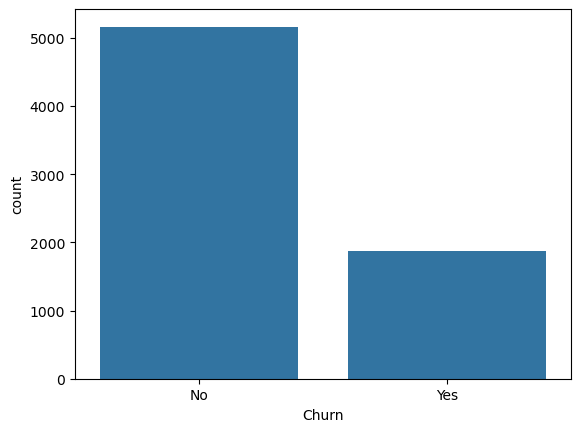

In [15]:
sns.countplot(x="Churn", data = df)

In [16]:
# the above data is imbalanced, to train the models we have to balance the data

<Axes: xlabel='Churn', ylabel='count'>

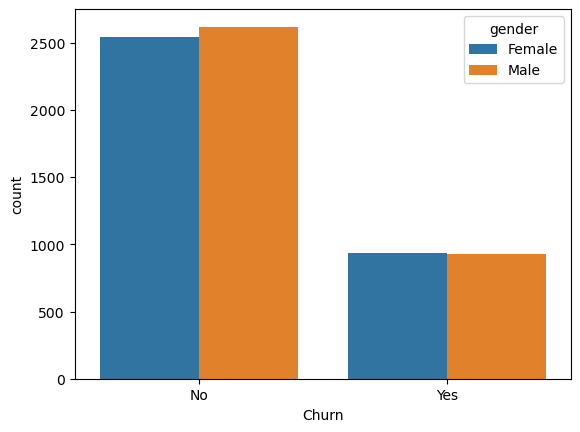

In [17]:
sns.countplot(x="Churn", hue="gender", data=df)

<Axes: xlabel='Churn', ylabel='count'>

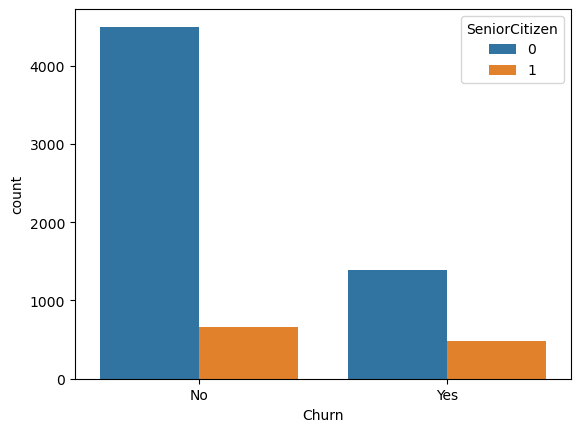

In [18]:
sns.countplot(x="Churn", hue="SeniorCitizen", data = df)

senior citizen are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

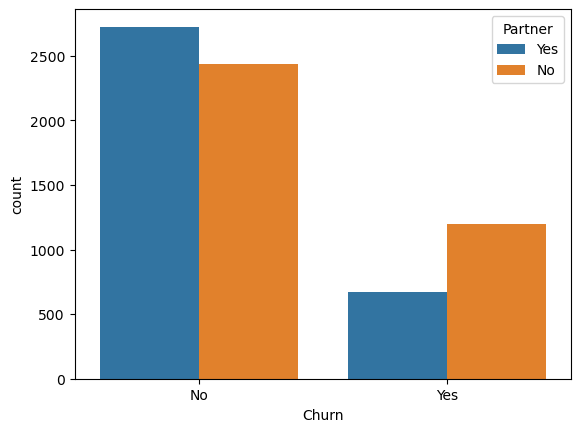

In [20]:
sns.countplot(x="Churn", hue="Partner", data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

customer without partners or single are more likely to churn

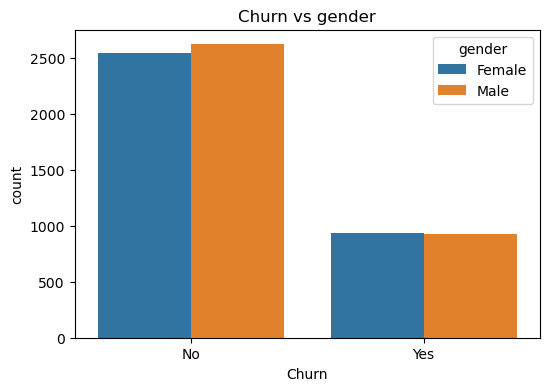

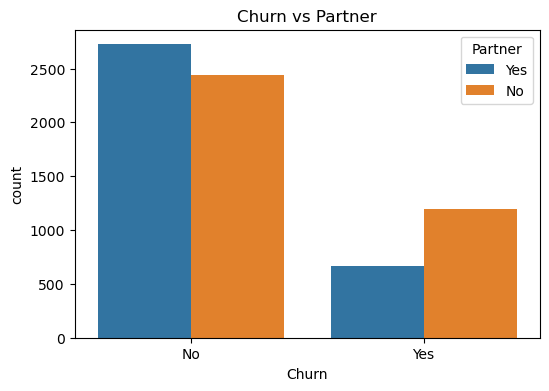

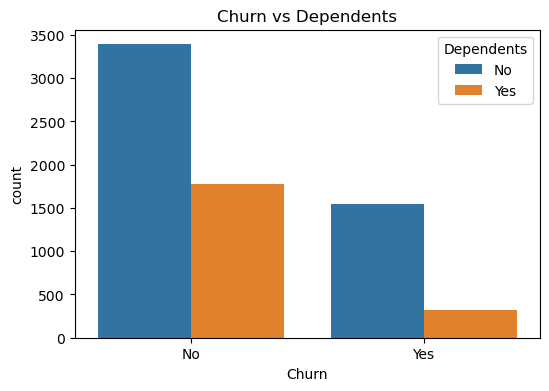

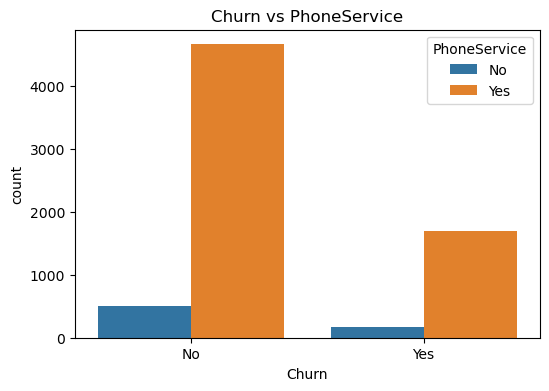

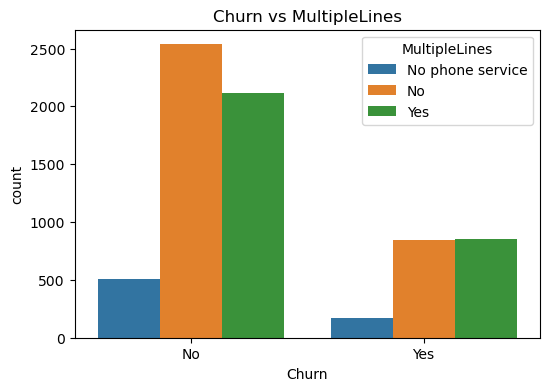

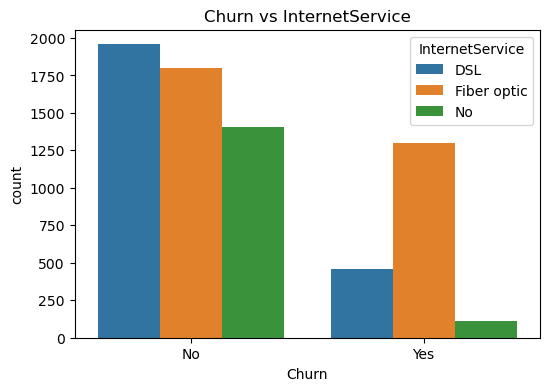

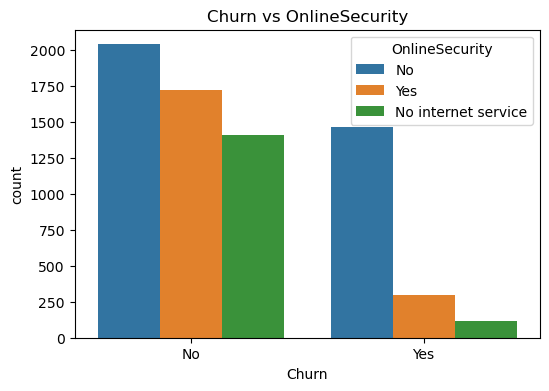

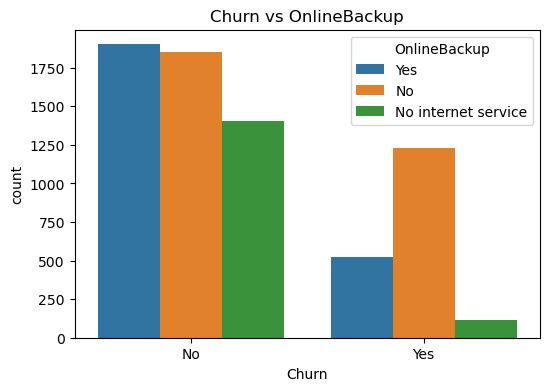

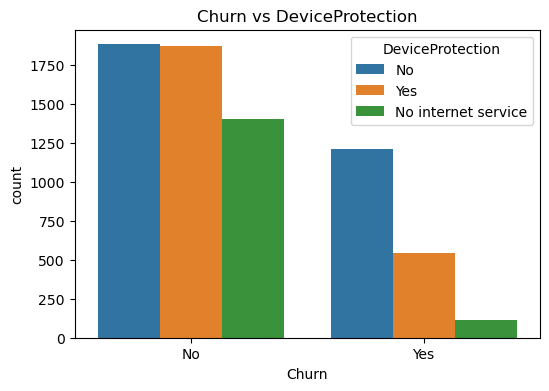

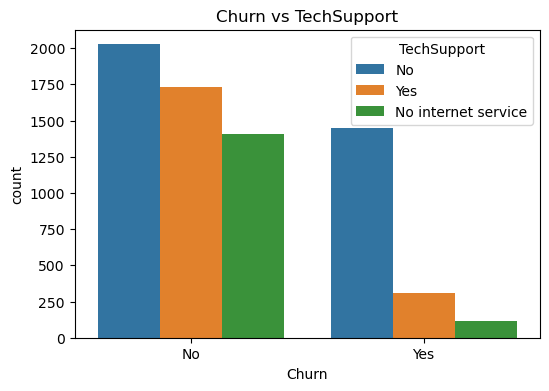

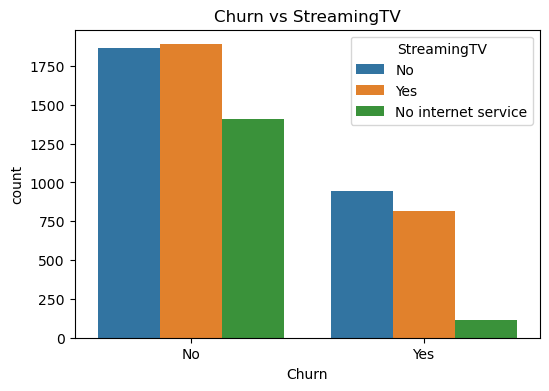

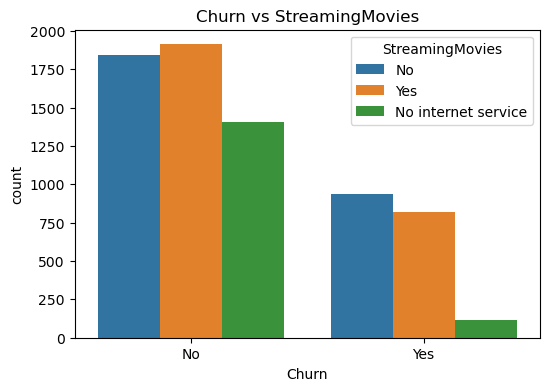

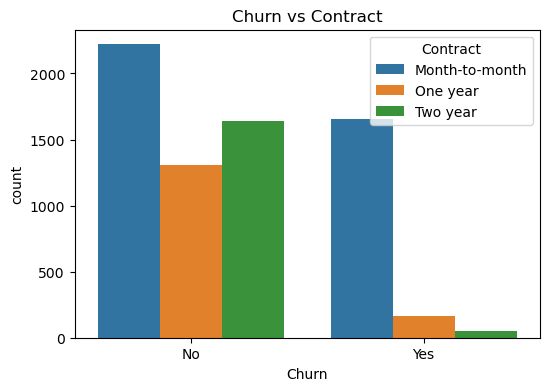

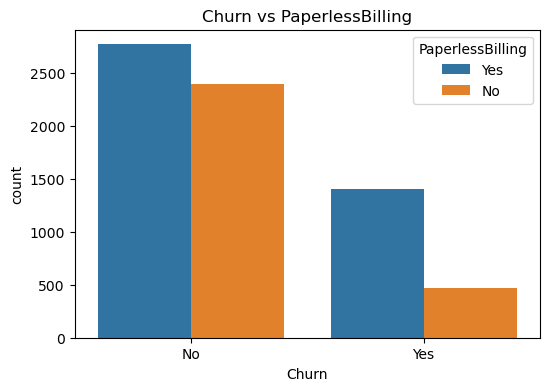

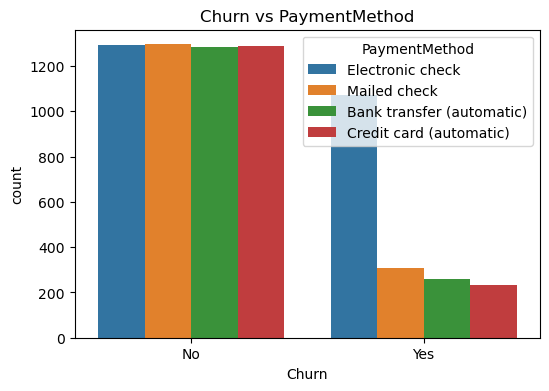

In [23]:
for i in df.columns:
    if (i != "Churn") & (df[i].dtype != np.float64) & (df[i].dtype != np.int64):   # avoid plotting Churn against itself
        plt.figure(figsize=(6,4))
        sns.countplot(x="Churn", hue=i, data=df)
        plt.title(f"Churn vs {i}")
        plt.show()

* Those who has opted for fiber are mostly like to churn
* Those who has no online security are more likely to churn
* Those who doesnt have no online backup are most likely to churn
* no device protection are more likely to churn
* no tech support
* no streaming movies
* month to month are moving to churn
* paperless bills 
* electronic check


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

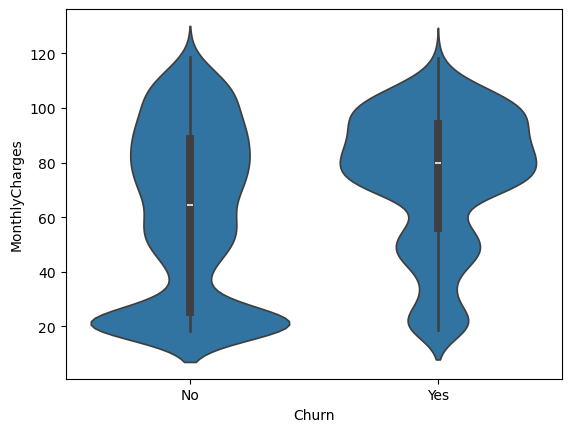

In [25]:
sns.violinplot(x="Churn", y = "MonthlyCharges", data = df)

* churn increses with increase in monthly charges

<Axes: xlabel='Churn', ylabel='TotalCharges'>

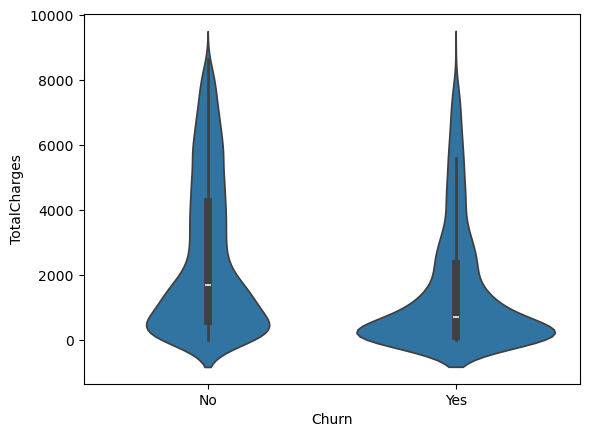

In [27]:
sns.violinplot(x="Churn", y="TotalCharges", data = df)

<Axes: xlabel='Churn', ylabel='tenure'>

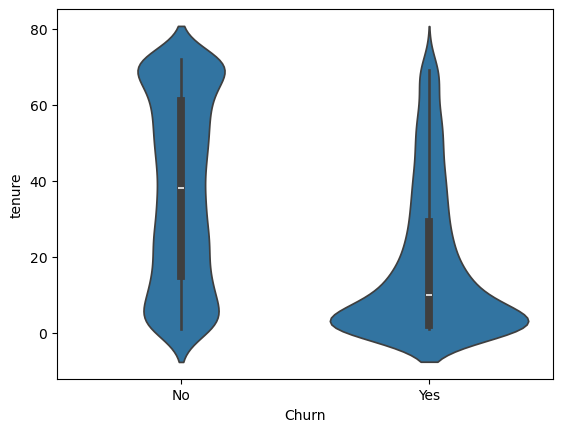

In [28]:
sns.violinplot(x="Churn", y = "tenure", data = df)

* people with less tenure are more likely to churn

<Axes: xlabel='Churn', ylabel='tenure'>

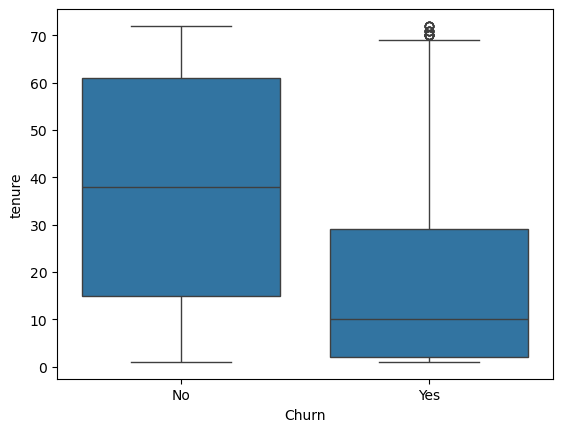

In [30]:
sns.boxplot(x="Churn", y="tenure", data=df)

<Axes: >

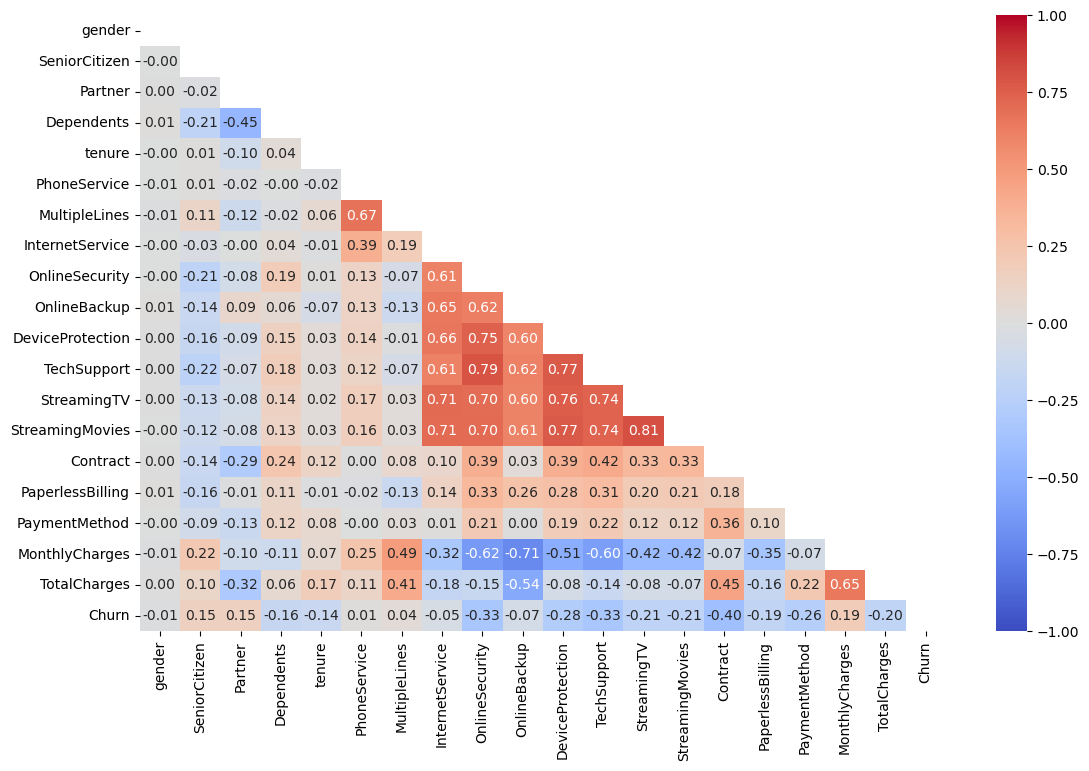

In [31]:
plt.figure(figsize=(13, 8))
corr = df.apply(lambda x: pd.factorize(x)[0] if x.dtype!='float64' else x).corr()  # FACTORIZATION used to make values as 0's and 1's from cate columns
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1, vmin=-1, center=0, annot = True, fmt=".2f")

# Label Encoding

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [34]:
cat_cols = [i for i in df.columns if df[i].dtype == "object"]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [35]:
from sklearn.preprocessing import LabelEncoder
for cols in cat_cols:
    le = LabelEncoder()
    df[cols] = le.fit_transform(df[cols])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

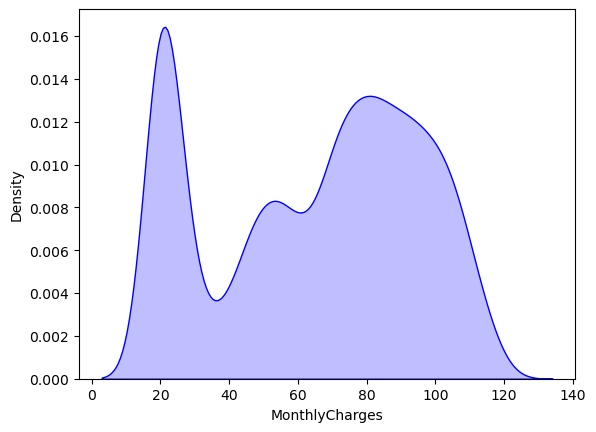

In [36]:
sns.kdeplot(df["MonthlyCharges"], color = "blue", shade = True)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

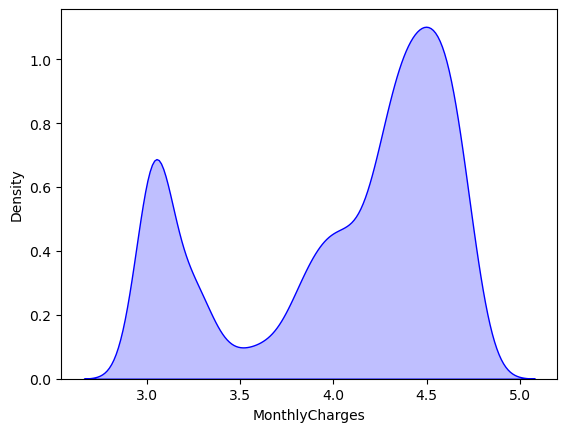

In [37]:
sns.kdeplot(np.log(df["MonthlyCharges"]+1), color = "blue", shade = True)  # log is used normalize the high values into stable values used for numerical values

In [38]:
df["MonthlyCharges"] = np.log(df["MonthlyCharges"]+1)
df["TotalCharges"] = np.log(df["TotalCharges"]+1)

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

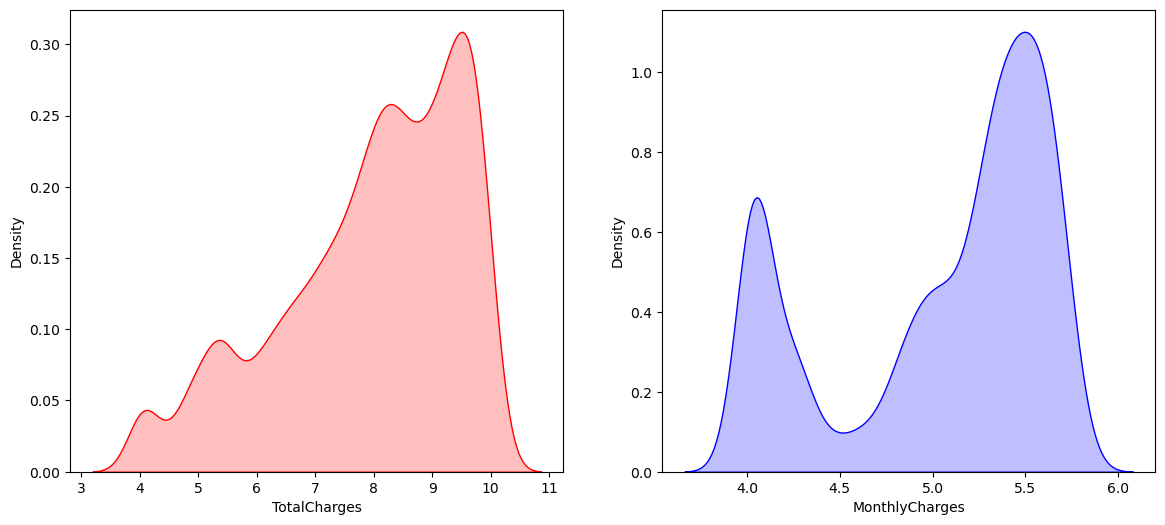

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.kdeplot(df["TotalCharges"]+1, ax = axes[0], color="red", shade=True)
sns.kdeplot(df["MonthlyCharges"]+1, ax = axes[1], color="blue", shade=True)

In [40]:
X = df.drop("Churn", axis = 1)

In [41]:
y = df["Churn"]

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,3.429137,3.429137,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,4.059581,7.544597,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,4.004602,4.692723,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,3.768153,7.518471,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,4.272491,5.028148,1


# model building

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify = y)

In [45]:
#initilize and train model
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [149]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', {0:1, 1:3}]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='precision',   # optimize for precision
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [167]:
from sklearn.ensemble import RandomForestClassifier

#initialize model 
model = RandomForestClassifier( class_weight={0:1, 1:3},      # penalizes misclassifying minority class
    random_state=45)
model.fit(X_train, y_train)

#get predictions
#y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
threshold = 0.69   # try 0.55–0.7
y_pred = (y_proba >= threshold).astype(int)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1033
           1       0.72      0.26      0.38       374

    accuracy                           0.78      1407
   macro avg       0.75      0.61      0.62      1407
weighted avg       0.76      0.78      0.73      1407



In [51]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
cat_cols.remove("Churn")
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [177]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
 #initilize model and train
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train, cat_features=cat_cols)

#get Predictions
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [54]:
from sklearn.metrics import confusion_matrix

<Axes: >

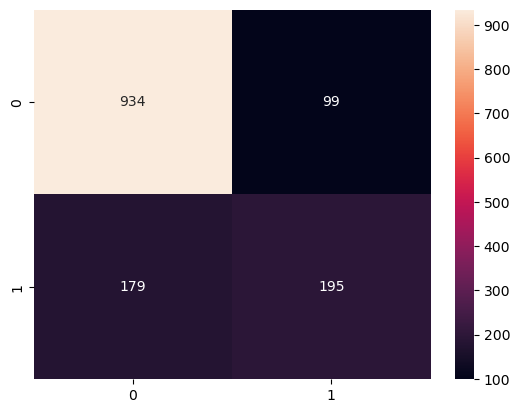

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [56]:
# most of the are correct '934' it is 80%

In [57]:
import joblib

In [179]:
joblib.dump(model, "CBC.pkl")

['CBC.pkl']